In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
Fraud_data=pd.read_csv("D:\softwares\Fraud.csv")

In [85]:
Fraud_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [86]:
Fraud_data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [87]:
Fraud_data.shape

(6362620, 11)

In [88]:
Fraud_data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [89]:
Fraud_data.duplicated().sum()
Fraud_data.drop_duplicates(inplace=True)
Fraud_data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [90]:
Fraud_data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [91]:
Fraud_data.drop([ 'nameOrig','nameDest', 'oldbalanceDest', 'newbalanceDest'],inplace=True,axis=1)
Fraud_data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0,0
2,1,TRANSFER,181.00,181.0,0.00,1,0
3,1,CASH_OUT,181.00,181.0,0.00,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0,0


In [92]:
Fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6362620 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   isFraud         int64  
 6   isFlaggedFraud  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 388.3+ MB


In [93]:
Fraud_data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [94]:
Fraud_data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [95]:
Transaction_type=Fraud_data.type.value_counts()
Transaction_type

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [96]:
labels=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN']

([<matplotlib.patches.Wedge at 0x2410a1a6b60>,
 [Text(0.49426122663384003, 0.9827033325711335, 'PAYMENT'),
  Text(-1.0906766219942048, -0.1429143318051433, 'TRANSFER'),
  Text(0.3384112332518691, -1.046650771369777, 'CASH_OUT'),
  Text(1.0495474656709025, -0.3293176541028222, 'DEBIT'),
  Text(1.0997698357971, -0.022501294869852733, 'CASH_IN')],
 [Text(0.26959703270936725, 0.5360199995842546, '35.2%'),
  Text(-0.594914521087748, -0.07795327189371452, '33.8%'),
  Text(0.1845879454101104, -0.5709004207471511, '22.0%'),
  Text(0.5724804358204921, -0.17962781132881211, '8.4%'),
  Text(0.5998744558893272, -0.012273433565374218, '0.7%')])

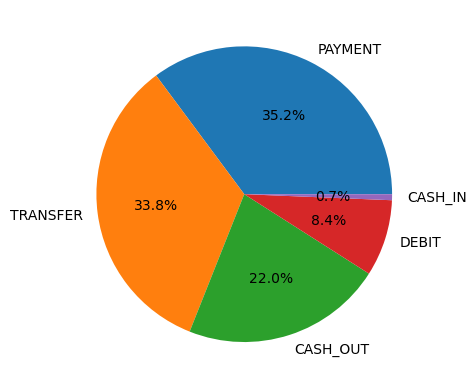

In [97]:
plt.pie(Transaction_type, labels =labels,autopct='%1.1f%%')

# fraud type of transactions

In [98]:
Fraud=Fraud_data.groupby('type',as_index=False)['isFraud'].sum()

In [99]:
Fraud_type=Fraud.sort_values(['isFraud'],ascending=False)

In [100]:
Fraud_type

,type,isFraud
1,CASH_OUT,4116
4,TRANSFER,4097
0,CASH_IN,0
2,DEBIT,0
3,PAYMENT,0


In [101]:
Fraud_data.isFlaggedFraud.unique()

array([0, 1], dtype=int64)

In [102]:
Fraud_data[ 'isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [103]:
Fraud_data['type']=Fraud_data['type'].map({'PAYMENT':1, 'TRANSFER':2, 'CASH_OUT':3, 'DEBIT':4, 'CASH_IN':5})

In [104]:
Fraud_data['isFraud']=Fraud_data['isFraud'].map({0:'legit',1:'fraud'})

# i am going to apply the machine learning model i will use Logistic regression we can use different algorithms like decision tree

In [105]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics 
from sklearn.metrics import accuracy_score

In [106]:
Fraud_data.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [123]:
x=Fraud_data[['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']]
x

,step,type,amount,oldbalanceOrg,newbalanceOrig
0,1,1,9839.64,170136.00,160296.36
1,1,1,1864.28,21249.00,19384.72
2,1,2,181.00,181.00,0.00
3,1,3,181.00,181.00,0.00
4,1,1,11668.14,41554.00,29885.86
...,...,...,...,...,...
6362615,743,3,339682.13,339682.13,0.00
6362616,743,2,6311409.28,6311409.28,0.00
6362617,743,3,6311409.28,6311409.28,0.00
6362618,743,2,850002.52,850002.52,0.00


In [124]:
y=Fraud_data.iloc[:,-2]
y

0          legit
1          legit
2          fraud
3          fraud
4          legit
           ...  
6362615    fraud
6362616    fraud
6362617    fraud
6362618    fraud
6362619    fraud
Name: isFraud, Length: 6362620, dtype: object

In [125]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [126]:
model=LogisticRegression()

In [127]:
model.fit(x_train,y_train)

LogisticRegression()

In [128]:
model.score(x_test,y_test)

0.9980849084182303

In [135]:
model.predict([[1,2,9839,170136,160296]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['legit'], dtype=object)

In [136]:
model.score(x_train,y_train)

0.998152490640648